In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## SASTRAWI EXMPL CODE

In [107]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()
sentence = 'Perekonomian Indonesia sedang dalam pertumbuhan/yang membanggakan'
stemmer.stem(sentence)

'ekonomi indonesia sedang dalam tumbuh yang bangga'

In [108]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
kalimat = 'Dengan Menggunakan Python dan Library Sastrawi saya dapat melakukan proses Stopword Removal'
swdel = StopWordRemoverFactory().create_stop_word_remover()
swdel.remove(kalimat)

'Dengan Menggunakan Python Library Sastrawi dapat melakukan proses Stopword Removal'

### START DATA EXPLORATION

In [109]:
data=pd.read_csv('UKARA DATA A/Data A/data_train_A.csv')
print(len(data))
print(data.groupby(data['LABEL']).count())
data.head()


268
       RES_ID  RESPONSE
LABEL                  
0          77        77
1         191       191


,RES_ID,RESPONSE,LABEL
0,TRA1,intetraksi/beradaptasi terhadap lingkungan yan...,1
1,TRA2,seperti jatuhnya meteor tsunami gempa bumi,0
2,TRA3,hanya tuhan yang tahu tantangan nya itu apaan,0
3,TRA4,mereka akan sulit beradaptasi,1
4,TRA5,"Tempat tinggal, ekonomi, dan pekerjaan",1


In [110]:
data.dtypes

RES_ID      object
RESPONSE    object
LABEL        int64
dtype: object

Text(0.5, 1.0, 'count label')

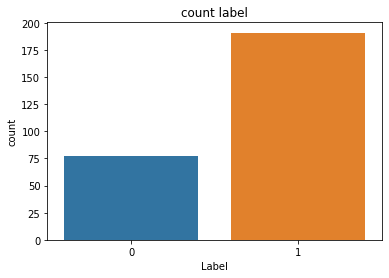

In [111]:
sns.countplot(data['LABEL'])
plt.xlabel('Label')
plt.title('count label')

## PREP DATA

In [112]:
data['processed'] = data['RESPONSE'].str.lower()
data.head()

,RES_ID,RESPONSE,LABEL,processed
0,TRA1,intetraksi/beradaptasi terhadap lingkungan yan...,1,intetraksi/beradaptasi terhadap lingkungan yan...
1,TRA2,seperti jatuhnya meteor tsunami gempa bumi,0,seperti jatuhnya meteor tsunami gempa bumi
2,TRA3,hanya tuhan yang tahu tantangan nya itu apaan,0,hanya tuhan yang tahu tantangan nya itu apaan
3,TRA4,mereka akan sulit beradaptasi,1,mereka akan sulit beradaptasi
4,TRA5,"Tempat tinggal, ekonomi, dan pekerjaan",1,"tempat tinggal, ekonomi, dan pekerjaan"


In [114]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stemmer = StemmerFactory().create_stemmer()
swdel = StopWordRemoverFactory().create_stop_word_remover()

tmp = 0 #row index
for row in data['processed']:
    data['processed'][tmp] = stemmer.stem(row)
    tmp = tmp+1
    
tmp = 0 #row index
for row in data['processed']:
    data['processed'][tmp] = swdel.remove(row)
    tmp = tmp+1
    
data.head()

C:\Users\iykmuham0008\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\iykmuham0008\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,RES_ID,RESPONSE,LABEL,processed
0,TRA1,intetraksi/beradaptasi terhadap lingkungan yan...,1,intetraksi adaptasi hadap lingkung baru
1,TRA2,seperti jatuhnya meteor tsunami gempa bumi,0,jatuh meteor tsunami gempa bumi
2,TRA3,hanya tuhan yang tahu tantangan nya itu apaan,0,tuhan tahu tantang nya apa
3,TRA4,mereka akan sulit beradaptasi,1,akan sulit adaptasi
4,TRA5,"Tempat tinggal, ekonomi, dan pekerjaan",1,tempat tinggal ekonomi kerja


In [115]:
with pd.option_context('display.max_rows', 999,'display.max_colwidth', 999):
    print(data['processed'].head())
    print(data['processed'].tail())
    #print(data['processed'])

0    intetraksi adaptasi hadap lingkung baru
1            jatuh meteor tsunami gempa bumi
2                 tuhan tahu tantang nya apa
3                        akan sulit adaptasi
4               tempat tinggal ekonomi kerja
Name: processed, dtype: object
263                                                                       harus ajar adaptasi lingkung baru
264    salah satu tantang akan hadap ungsi iklim sulit baur cari kerja baru laku langsung hidup tempat baru
265                                              hadap lingkung mungkin akan perlu waktu yang lama adaptasi
266                                     akan baur orang baru usaha terima budaya baru cari mampu kerja beda
267                                                                                     cari tempat tinggal
Name: processed, dtype: object


## MODELING without processing

In [7]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(data['RESPONSE'].apply(lambda x:x.lower()),data['LABEL'],
    stratify=data['LABEL'],
    test_size=0.2, 
    random_state=420)
print(xtr.shape)
print(xts.shape)

(214,)
(54,)


In [13]:
test=pd.read_csv('UKARA DATA A/Data A/data_dev_A.csv')
#print(np.array(test['RESPONSE']).reshape(len(test['RESPONSE']),1))

In [14]:

multinomialPipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',MultinomialNB())
])
multinomialPipeline.fit(xtr,ytr)
multinomialPrediksiTrain = multinomialPipeline.predict(xtr)
multinomialPrediksi = multinomialPipeline.predict(xts)
multinomialPrediksiDev = multinomialPipeline.predict(test['RESPONSE'].apply(lambda x:x.lower()))

In [15]:
complementPipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',ComplementNB())
])
complementPipeline.fit(xtr,ytr)
complementPrediksiTrain = complementPipeline.predict(xtr)
complementPrediksi = complementPipeline.predict(xts)
complementPrediksiDev = complementPipeline.predict(test['RESPONSE'].apply(lambda x:x.lower()))

In [16]:
adaboostPipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',AdaBoostClassifier())
])
adaboostPipeline.fit(xtr,ytr)
adaboostPrediksiTrain = adaboostPipeline.predict(xtr)
adaboostPrediksi = adaboostPipeline.predict(xts)
adaboostPrediksiDev = adaboostPipeline.predict(test['RESPONSE'].apply(lambda x:x.lower()))

In [17]:
print(multinomialPrediksi)
print("----------------------------------------------------")
print(complementPrediksi)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
----------------------------------------------------
[1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


In [18]:
print('Dengan metode MultinomialNB, diperoleh: ')
print(classification_report(yts,multinomialPrediksi))
print('Skor f1:',f1_score(yts,multinomialPrediksi))
print(confusion_matrix(yts,multinomialPrediksi))

Dengan metode MultinomialNB, diperoleh: 
              precision    recall  f1-score   support

           0       1.00      0.19      0.32        16
           1       0.75      1.00      0.85        38

    accuracy                           0.76        54
   macro avg       0.87      0.59      0.58        54
weighted avg       0.82      0.76      0.69        54

Skor f1: 0.8539325842696629
[[ 3 13]
 [ 0 38]]


In [19]:
print('Dengan metode ComplementNB, diperoleh: ')
# print(classification_report(ytr,complementPrediksiTrain))
print(classification_report(yts,complementPrediksi))
print('Skor f1:',f1_score(yts,complementPrediksi))
print(confusion_matrix(yts,complementPrediksi))

Dengan metode ComplementNB, diperoleh: 
              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.82      0.97      0.89        38

    accuracy                           0.83        54
   macro avg       0.86      0.74      0.77        54
weighted avg       0.84      0.83      0.82        54

Skor f1: 0.891566265060241
[[ 8  8]
 [ 1 37]]


In [20]:
print('Dengan metode AdaBoostClassifier, diperoleh: ')
# print(classification_report(ytr,adaboostPrediksiTrain))
print(classification_report(yts,adaboostPrediksi))
print('Skor f1:',f1_score(yts,adaboostPrediksi))
print(confusion_matrix(yts,complementPrediksi))

Dengan metode AdaBoostClassifier, diperoleh: 
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.86      0.82      0.84        38

    accuracy                           0.78        54
   macro avg       0.74      0.75      0.74        54
weighted avg       0.79      0.78      0.78        54

Skor f1: 0.8378378378378377
[[ 8  8]
 [ 1 37]]


## MODELING with processing

In [116]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data['processed'].apply(lambda x:x.lower()),data['LABEL'],
    stratify=data['LABEL'],
    test_size=0.2, 
    random_state=420)
print(xtrain.shape)
print(xtest.shape)

(214,)
(54,)


In [117]:

multinomialPipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',MultinomialNB())
])
multinomialPipeline.fit(xtrain,ytrain)
multinomialPrediksiTrain = multinomialPipeline.predict(xtrain)
multinomialPrediksi = multinomialPipeline.predict(xtest)
#multinomialPrediksiDev = multinomialPipeline.predict(test['RESPONSE'].apply(lambda x:x.lower()))

In [118]:
complementPipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',ComplementNB())
])
complementPipeline.fit(xtrain,ytrain)
complementPrediksiTrain = complementPipeline.predict(xtrain)
complementPrediksi = complementPipeline.predict(xtest)
#complementPrediksiDev = complementPipeline.predict(test['RESPONSE'].apply(lambda x:x.lower()))

In [119]:
adaboostPipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',AdaBoostClassifier())
])
adaboostPipeline.fit(xtrain,ytrain)
adaboostPrediksiTrain = adaboostPipeline.predict(xtrain)
adaboostPrediksi = adaboostPipeline.predict(xtest)
#adaboostPrediksiDev = adaboostPipeline.predict(test['RESPONSE'].apply(lambda x:x.lower()))

In [120]:
print(multinomialPrediksi)
print("----------------------------------------------------")
print(complementPrediksi)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
----------------------------------------------------
[1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]


In [121]:
print(' MultinomialNB + wordstop + stemming, diperoleh: ')
print(classification_report(ytest,multinomialPrediksi))
print('Skor f1:',f1_score(ytest,multinomialPrediksi))
print(confusion_matrix(ytest,multinomialPrediksi))

 MultinomialNB + wordstop + stemming, diperoleh: 
              precision    recall  f1-score   support

           0       1.00      0.31      0.48        16
           1       0.78      1.00      0.87        38

    accuracy                           0.80        54
   macro avg       0.89      0.66      0.67        54
weighted avg       0.84      0.80      0.76        54

Skor f1: 0.8735632183908045
[[ 5 11]
 [ 0 38]]


In [122]:
print('ComplementNB + wordstop + stemming, diperoleh: ')
# print(classification_report(ytr,complementPrediksiTrain))
print(classification_report(ytest,complementPrediksi))
print('Skor f1:',f1_score(ytest,complementPrediksi))
print(confusion_matrix(ytest,complementPrediksi))

ComplementNB + wordstop + stemming, diperoleh: 
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.86      0.95      0.90        38

    accuracy                           0.85        54
   macro avg       0.85      0.79      0.81        54
weighted avg       0.85      0.85      0.84        54

Skor f1: 0.9
[[10  6]
 [ 2 36]]


In [123]:
print(' AdaBoostClassifier + wordstop + stemming, diperoleh: ')
# print(classification_report(ytr,adaboostPrediksiTrain))
print(classification_report(ytest,adaboostPrediksi))
print('Skor f1:',f1_score(ytest,adaboostPrediksi))
print(confusion_matrix(ytest,complementPrediksi))

 AdaBoostClassifier + wordstop + stemming, diperoleh: 
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.85      0.89      0.87        38

    accuracy                           0.81        54
   macro avg       0.78      0.76      0.77        54
weighted avg       0.81      0.81      0.81        54

Skor f1: 0.8717948717948718
[[10  6]
 [ 2 36]]
